In [2]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [3]:
data = main(one_hot=True, dataV=pd.read_csv("data/BST_V2toV9.csv", header=0, sep=";"), retained=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 9 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 3 seconds
Elapsed time to compute change values in catagorical columns: 1 minutes and 36 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 1 minutes and 49 seconds


In [4]:
data.head()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  1                                                                   
1                                                  0                                                                   
2                                                  0                                                                   
3                                                  0                                                                   
4                                                  0                                                                   

   Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                2.0                                                                    
1                                                0.0                                                                    
2                                                0.0                                                                    
3                                                0.0                                                                    
4                                                0.0                                                                    

   Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                     
1                                                  0                                                                     
2                                                  1                                                                     
3                                                  0                                                                     
4                                                  0                                                                     

   Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
0                                                  0                                                                    
1                                                  0                                                                    
2                                                  1                                                                    
3                                                  0                                                                    
4                                                  0                                                                    

   outcome  (Q1- Your sex?_A man,)  (Q1- Your sex?_A woman,)  \
0        2                       1                         0   
1        1                       1                         0   
2        3                       0                         1   
3        0                       1                         0   
4        2                       1                         0   

   (Q1- Your sex?_nan,)  (Q2- How old are you?_18 - 30,)  \
0                     0                                0   
1                     0                                1   
2                     0                                0   
3                     0                                0   
4                     0                                0   

   (Q2- How old are you?_30 - 39,)  (Q2- How old are you?_40 - 44,)  \
0                                1                                0   
1                                0                                0   
2                                0                                0   
3                                1                               

In [5]:
data.describe()

Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                   
mean                                            0.183302                                                                   
std                                             0.452550                                                                   
min                                             0.000000                                                                   
25%                                             0.000000                                                                   
50%                                             0.000000                                                                   
75%                                             0.000000                                                                   
max                                             9.000000                                                                   

       Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37680.000000                                                                    
mean                                            0.243471                                                                    
std                                             0.558963                                                                    
min                                             0.000000                                                                    
25%                                             0.000000                                                                    
50%                                             0.000000                                                                    
75%                                             0.000000                                                                    
max                                             9.000000                                                                    

       Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                     
mean                                            0.192431                                                                     
std                                             0.483806                                                                     
min                                             0.000000                                                                     
25%                                             0.000000                                                                     
50%                                             0.000000                                                                     
75%                                             0.000000                                                                     
max                                             9.000000                                                                     

       Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?  \
count                                       37681.000000                                                                    
mean                                            0.201799                                                                    
std                                             0.554549                                                                    
min                                             0.000000                                                                    
25% 

In [6]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [7]:
data_copy = data.copy()

In [8]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [9]:
data_copy['outcome']

0        2
1        1
2        3
3        0
4        2
        ..
37676    3
37677    2
37678    0
37679    0
37680    1
Name: outcome, Length: 37681, dtype: int64

In [10]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(429, 37681)

In [11]:
# Check for non-finite values
if not np.all(np.isfinite(df_transposed.values)):
    print("Data contains non-finite values.")
    print(df_transposed[~np.isfinite(df_transposed).all(axis=1)])
else:
    print("Data is finite.")

# Handle non-finite values (example: filling NaNs with the column mean)
df_transposed = df_transposed.apply(lambda x: x.fillna(x.mean()), axis=0)

# Verify again if all values are finite
if not np.all(np.isfinite(df_transposed.values)):
    raise ValueError("There are still non-finite values in the data.")
else:
    print("All values are now finite.")


Data contains non-finite values.
                                                       0         1      \
Q4- (7 to 12 years old) In each of the followin...  3.142522 -0.435583   

                                                       2         3      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       4         5      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       6         7      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       8         9      \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       10        11     \
Q4- (7 to 12 years old) In each of the followin... -0.435583 -0.435583   

                                                       12        13     \

In [12]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean', optimal_ordering=True)

np.shape(linked)

(428, 4)

In [13]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
# c1 and c2 are the two clusters that are being joined
# distance is the distance between the two clusters
# size is the number of features in the cluster

df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.tail()

c1   c2     distance  size
423  848  845   661.561007   122
424  834  852   715.568275   147
425  853  851   929.702971   349
426  854  846   968.531124   400
427  850  855  1328.563063   429

In [14]:
from scipy.cluster.hierarchy import inconsistent

incons = inconsistent(linked)
print(incons)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.51151876e+01 1.01859848e-07 1.00000000e+00 0.00000000e+00]
 [2.37683521e+01 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [7.60858054e+02 1.51369816e+02 3.00000000e+00 1.11544641e+00]
 [8.03953992e+02 2.52178200e+02 3.00000000e+00 6.52622360e-01]
 [9.56048295e+02 3.78910427e+02 3.00000000e+00 9.83120922e-01]]


In [15]:
# !pip install gap-stat
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_transposed, cluster_array=np.arange(1, 60))
print(f"Optimal number of clusters: {n_clusters}")


/Users/dilancroos/Documents/LPI/Study_Meterial/Internship/working_data/.sick/lib/python3.12/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(
/Users/dilancroos/Documents/LPI/Study_Meterial/Internship/working_data/.sick/lib/python3.12/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(


Optimal number of clusters: 49


In [16]:
# threshold for optimal number of clusters
threshold = df_linked.loc[427-n_clusters, 'distance']

print(f"Threshold for optimal number of clusters: {threshold}")

Threshold for optimal number of clusters: 315.2209669103396


In [17]:
# number of clusters based on threshold

clusters = fcluster(linked, n_clusters, criterion='maxclust')
np.unique(clusters)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

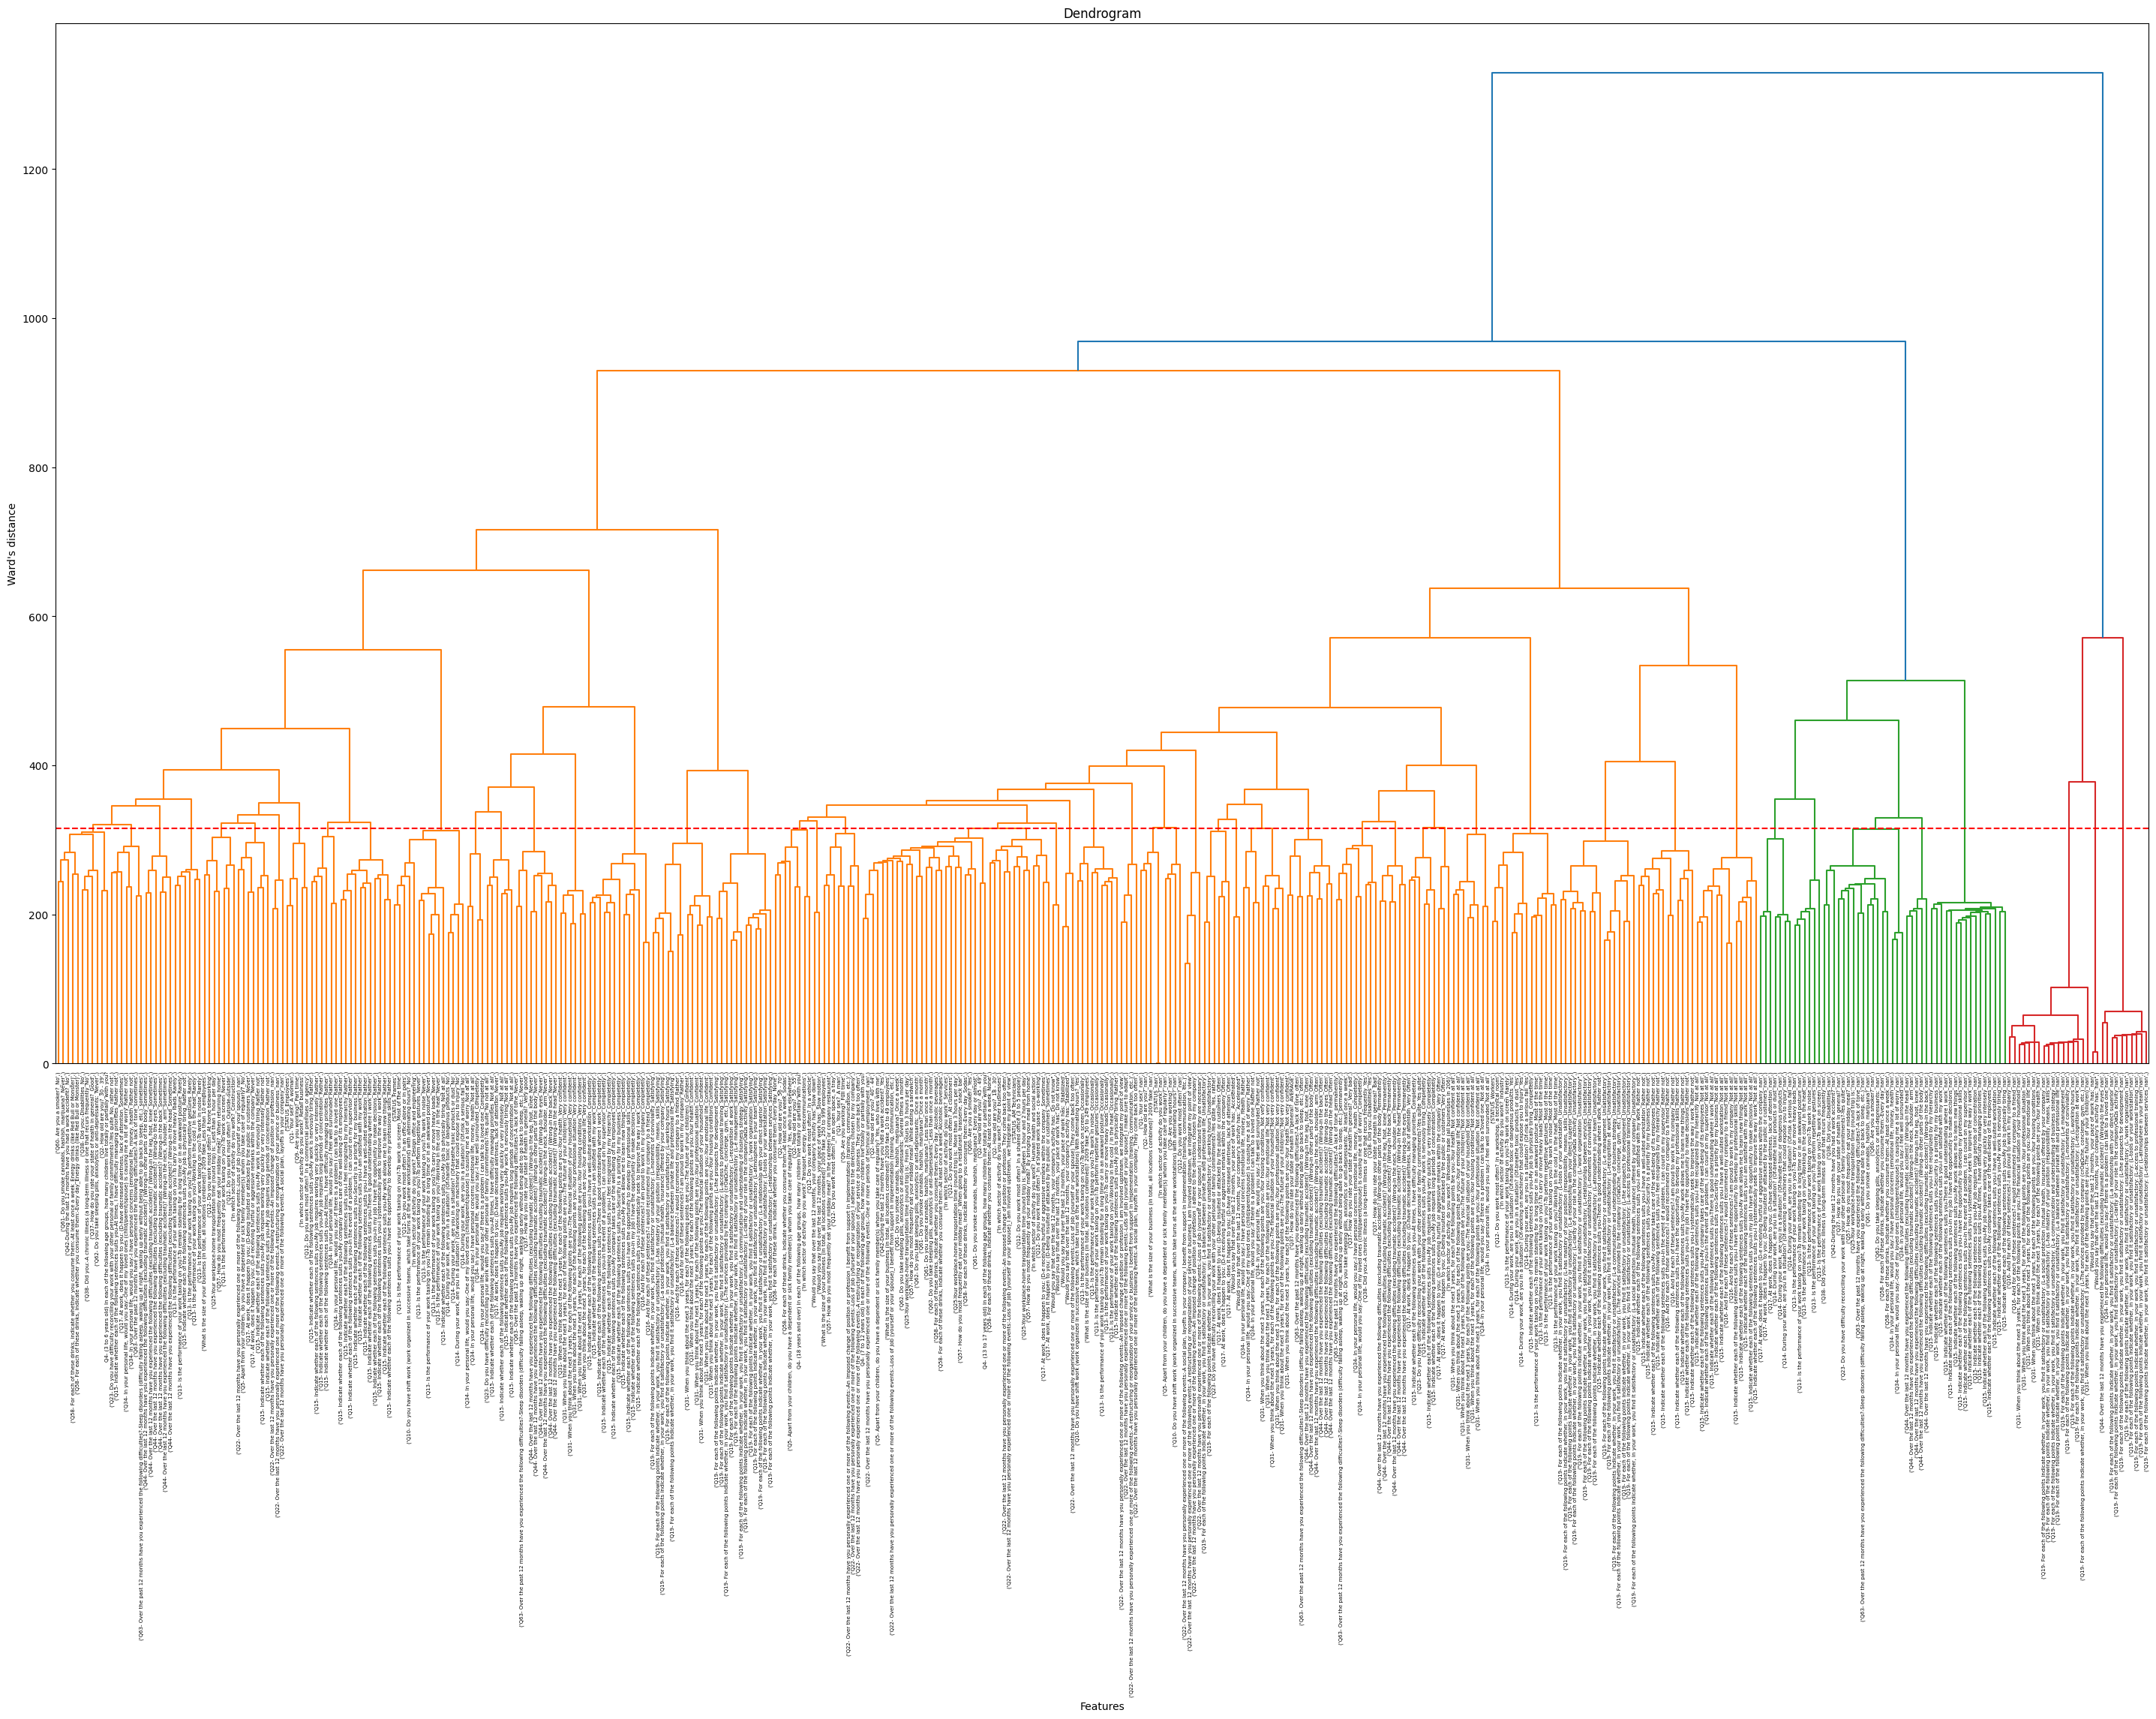

In [18]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
plt.axhline(y=threshold, color='r', linestyle='--')
# 45 degree angle for x axis labels
plt.xticks(rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel("Ward's distance")

plt.savefig('outputs/01_01_feat_cluster_29/dendrogram.png')

In [19]:
num_clusters = 56 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [20]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [21]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

feature  cluster   corr  abs_corr
0  ("Would you say that over the last 12 months, ...        1  0.062     0.062
1  ('Would you say that over the last 12 months, ...        1  0.062     0.062
2  ('Q19- For each of the following points indica...        2  0.100     0.100
3  ('Q19- For each of the following points indica...        2  0.100     0.100
4  ('Q31- When you think about the next 3 years, ...        2  0.100     0.100
5  ('Q31- When you think about the next 3 years, ...        2  0.100     0.100
6  ('Q16- And for each of these sentences?-I woul...        2  0.099     0.099
7  ('Q16- And for each of these sentences?-I am p...        2  0.099     0.099
8  ('Q19- For each of the following points indica...        2  0.099     0.099
9  ('Q19- For each of the following points indica...        2  0.099     0.099

In [22]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

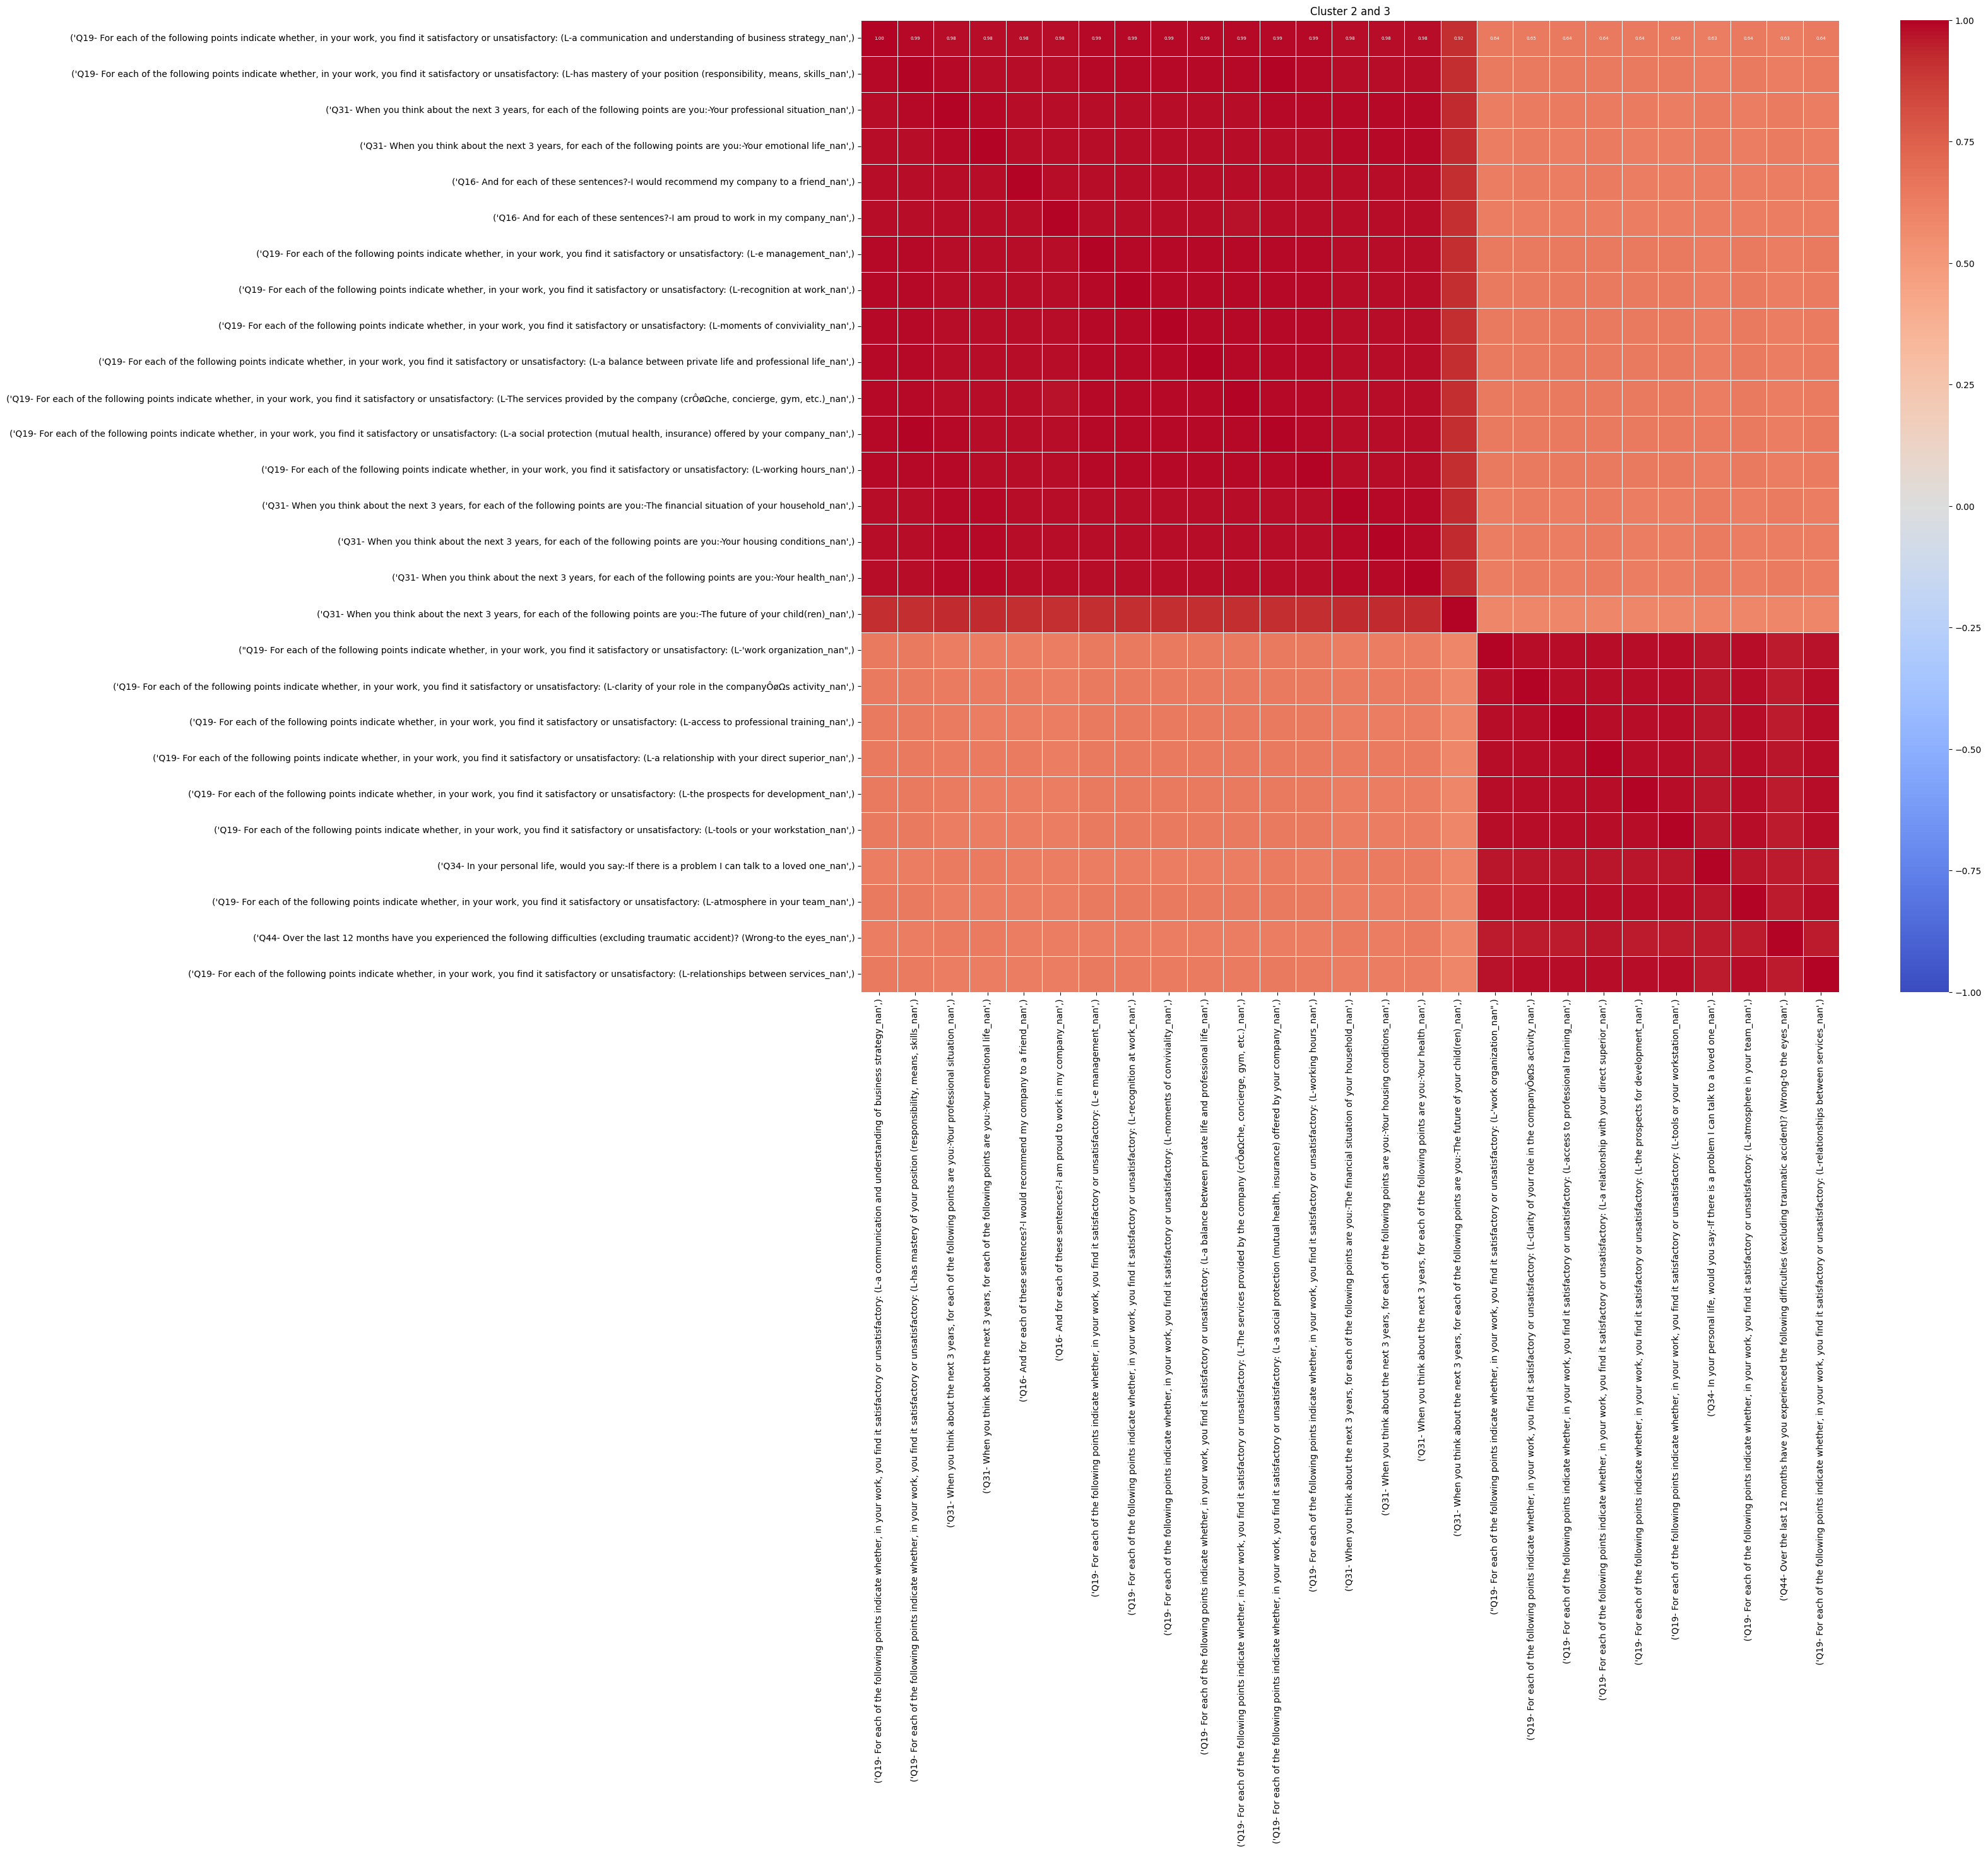

In [23]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix with correlation values in all cells
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Cluster 2 and 3')


plt.savefig('outputs/01_01_feat_cluster_29/corr_cluster_2_3.png')

In [24]:
df_clusters.to_csv('outputs/01_01_feat_cluster_29/feature_clusters.csv', index=False, header=True, sep=';')

In [25]:
# print the features in each cluster

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    print(f"{df_clusters[df_clusters['cluster']==i]['feature'].values} \ncorr: {df_clusters[df_clusters['cluster']==i]['corr'].values}")
    print('\n')

Cluster 1:
['("Would you say that over the last 12 months, your company\'s activity has:_nan",)'
 "('Would you say that over the last 12 months, your pace of work has:_nan',)"] 
corr: [0.062 0.062]


Cluster 2:
["('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-a communication and understanding of business strategy_nan',)"
 "('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-has mastery of your position (responsibility, means, skills_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your professional situation_nan',)"
 "('Q31- When you think about the next 3 years, for each of the following points are you:-Your emotional life_nan',)"
 "('Q16- And for each of these sentences?-I would recommend my company to a friend_nan',)"
 "('Q16- And for each of these sentences?-I am proud to work in my company_nan',)

In [26]:
# find the features with the highest importance in each cluster in a RF model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [27]:
df_features = mice(df_features, df_features.columns)

In [28]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features, data['outcome'], test_size=0.2, random_state=42)

In [29]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Find What features in the cluster are more important

In [30]:
# Get feature importances for each cluster
feature_importances = []

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    features = df_clusters[df_clusters['cluster']==i]['feature'].values

    ft_and_importances = []

    for f in features:
        ft_index = df_features.columns.get_loc(f)
        importances = rf.feature_importances_[ft_index]
        ft_and_importances.append((f, importances))

    highest_important_feat = []
    highest_importance = max(ft_and_importances, key=lambda x: x[1])

    for f, fi in ft_and_importances:
        if fi == highest_importance[1]:
            highest_important_feat.append(f)

    print(f'Highest importance: {highest_importance}')  

    feature_importances.append(highest_important_feat[0])

print(f'Feature importances: {feature_importances}')

Cluster 1:
Highest importance: ("('Would you say that over the last 12 months, your pace of work has:_nan',)", 0.0028069193860163905)
Cluster 2:
Highest importance: ("('Q31- When you think about the next 3 years, for each of the following points are you:-The future of your child(ren)_nan',)", 0.001341298249259555)
Cluster 3:
Highest importance: ("('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-access to professional training_nan',)", 0.0007910696386347546)
Cluster 4:
Highest importance: ("('Q19- For each of the following points indicate whether, in your work, you find it satisfactory or unsatisfactory: (L-relationships between services_Satisfying',)", 0.0034503470011304693)
Cluster 5:
Highest importance: ("('Q31- When you think about the next 3 years, for each of the following points are you:-The future of your child(ren)_Confident',)", 0.002849346910619287)
Cluster 6:
Highest importance: ("('Q13- Is the performance

In [31]:
# Export feature_importances to a CSV file

df_feature_importances = pd.DataFrame(feature_importances)
df_feature_importances.to_csv('outputs/01_01_feat_cluster_29/cluster_feature_importances.csv', index=False, header=False, sep=';')

### Train with selected features

In [32]:
# get the data with only the features in feature_importances
df_features_selected = df_features[feature_importances]
print(df_features_selected.shape)

print(data['outcome'].head(20))

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_features_selected, data['outcome'], test_size=0.2, random_state=42)

(37681, 56)
0     2
1     1
2     3
3     0
4     2
5     1
6     3
7     2
8     1
9     0
10    0
11    0
12    1
13    0
14    3
15    1
16    3
17    0
18    0
19    2
Name: outcome, dtype: int64


In [33]:
accuracy_scores = []
models, test_accuracies = train_random_forests(X_train, y_train, X_test, y_test, 2)
accuracy_scores.append(np.mean(test_accuracies))
print(f"average test accuracy: {np.mean(test_accuracies)}")

Forest 1/2 trained with:
F1 score: 0.27981086867758687
test accuracy: 0.6480
train accuracy: 0.9997


AxisError: axis 1 is out of bounds for array of dimension 1

### Find which clusters are more important